In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]


In [2]:
import warnings
warnings.simplefilter(action="ignore" , category ="futurewarnings")

In [1]:
import pandas as pd
full_data=pd.read_csv('/content/titanic dataset.csv')

In [2]:
full_data.shape

(891, 12)

In [3]:
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


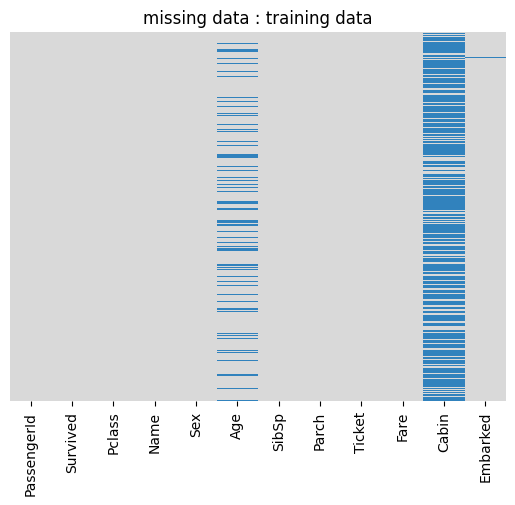

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(full_data.isnull() ,yticklabels=False , cbar=False ,cmap='tab20c_r' )
plt.title('missing data : training data')
plt.show()


<ipython-input-8-e5fda53e66ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass' , y='Age', data=full_data ,palette='GnBu_d' ).set_title('age by passenger class')


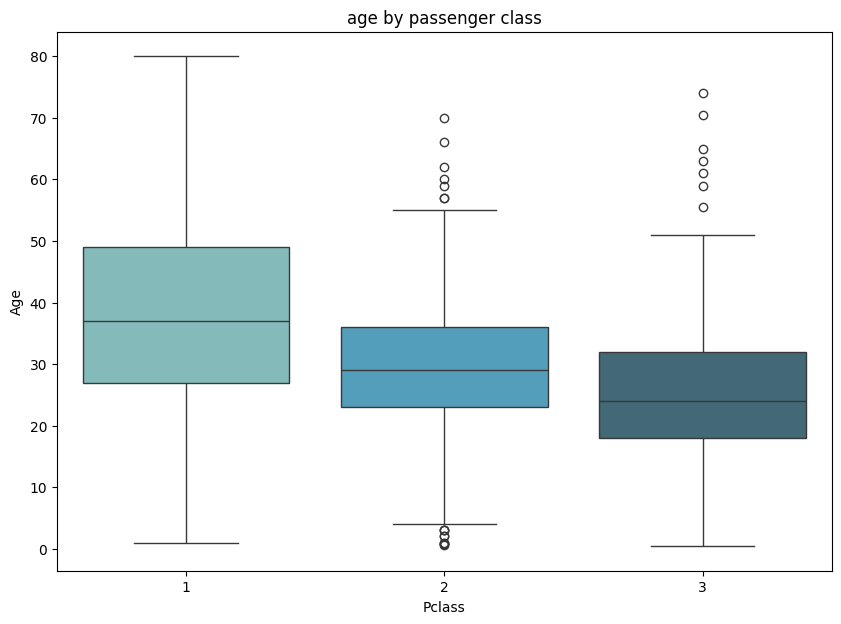

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass' , y='Age', data=full_data ,palette='GnBu_d' ).set_title('age by passenger class')
plt.show()

In [9]:
#imputation functions
def impute_age(cols):
  Age = cols[0]
  Pclass= cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37

    elif    Pclass==2:
        return 29
    else:
          return 24
  else:
    return Age

full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis=1)


In [10]:
full_data.drop('Cabin' , axis=1 ,inplace=True)

In [11]:
full_data.dropna(inplace=True)

In [12]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [13]:
#remove unneccessary columns
full_data.drop(['Name' ,'Ticket'] , axis=1 , inplace =True)
#object to category
object =['Sex' , 'Embarked']
#isko hmne category is liye kia q ke hm classification kr re hain jinmein binary classification hori ha mtln 2 categories
for colname in object:

  full_data[colname] = full_data[colname].astype('category')



In [14]:
full_data.drop('PassengerId' , inplace =True , axis =1)


In [15]:
#getting model ready
#shape of train data
full_data.shape

(889, 8)

In [16]:
#identify catagorical features
full_data.select_dtypes(['category']).columns


Index(['Sex', 'Embarked'], dtype='object')

In [17]:
#convert catagorical variables into dummies
#category to assign numbers
sex=pd.get_dummies(full_data['Sex'] , drop_first=True)

In [18]:
embarked =pd.get_dummies(full_data['Embarked'] , drop_first =True)

In [19]:
full_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [20]:
#add new dummy coloumns to data frame
#use concatinate function
full_data=pd.concat([full_data , sex , embarked] , axis =1)
full_data.head(5)    #encoding

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [21]:
import pandas as pd
full_data.info()
print('male' in full_data.columns)
print('embarked' in full_data.columns)
full_data.drop(['Sex' , 'Embarked' ] , axis=1, inplace =True)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
 8   male      889 non-null    uint8   
 9   Q         889 non-null    uint8   
 10  S         889 non-null    uint8   
dtypes: category(2), float64(2), int64(4), uint8(3)
memory usage: 53.2 KB
True
False


In [22]:
#split the data to be used in models
#target varibles ko separate krna hai
#x=independent varuables
#y=dependent variables
#create matrix of features
x=full_data.drop('Survived' , axis=1)
#create target variable
y= full_data['Survived']
#to split data trainig
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test =train_test_split(x,y, test_size=.20 , random_state=101)

In [23]:
#fix
# import mpdel
from sklearn.linear_model import LogisticRegression
#create instance of mode;
lreg=LogisticRegression()
#pass traninog data to model
lreg.fit(x_train , y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#predict
y_predict_lreg = lreg.predict(x_test)
print(y_predict_lreg)


[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


In [25]:
print(y_predict_lreg.shape)

(178,)


In [26]:
probabilities = lreg.predict_proba(x_test)[ : , 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.10915127 0.17773884 0.74863063 0.92024789 0.17923771 0.04185239
 0.11552158 0.23001998 0.07873819 0.67545481 0.78841017 0.94478461
 0.10913149 0.57761948 0.10933738 0.12252589 0.91641276 0.84248052
 0.54123867 0.09994164 0.10922985 0.0868429  0.42374298 0.34700701
 0.04218935 0.43905695 0.60009198 0.5892852  0.09286304 0.29915605
 0.09259718 0.25428985 0.0122366  0.10595792 0.10908021 0.11023797
 0.75631969 0.06360494 0.12243807 0.13434634 0.53049561 0.137305
 0.11903788 0.92785712 0.61223239 0.12691113 0.61587824 0.86598691
 0.10279812 0.26663971 0.48908488 0.7981049  0.16922781 0.12280859
 0.10902308 0.0718876  0.42735021 0.08616499 0.07421311 0.91080168
 0.67545481 0.93446331 0.88915289 0.08643931 0.13956377 0.04970037
 0.11557597 0.43211761 0.05795062 0.14299847 0.3381727  0.13570575
 0.61976683 0.88748463 0.11184754 0.7294167  0.08099363 0.13570575
 0.1036702  0.29700399 0.2992583  0.37619836 0.4506877  0.12252589
 0.28128942 0.65863248 0.07121188 0.87044956 0.09879186 0

In [ ]:
for i in range(len(x_test)):
  print(round(probabilities[i] , 3),"-->" , y_predict_lreg[i])

In [28]:
#score it
from sklearn.metrics import classification_report , accuracy_score
print("classification Model")
#accuracy
print("---" *30)
logreg_accuracy=round(accuracy_score(y_test , y_predict_lreg) *100,2)
print("accuracy" , logreg_accuracy , '*')

classification Model
------------------------------------------------------------------------------------------
accuracy 82.02 *


In [29]:
print("shape of x_train" , x_train.shape)
print("shape of y_train" , y_train.shape)
print("-----------------------------")
print("shape of x_test" , x_test)
print("shape of y_test" , y_test)

shape of x_train (711, 8)
shape of y_train (711,)
-----------------------------
shape of x_test      Pclass   Age  SibSp  Parch      Fare  male  Q  S
511       3  24.0      0      0    8.0500     1  0  1
613       3  24.0      0      0    7.7500     1  1  0
615       2  24.0      1      2   65.0000     0  0  1
337       1  41.0      0      0  134.5000     0  0  0
718       3  24.0      0      0   15.5000     1  1  0
..      ...   ...    ...    ...       ...   ... .. ..
155       1  51.0      0      1   61.3792     1  0  0
450       2  36.0      1      2   27.7500     1  0  1
756       3  28.0      0      0    7.7958     1  0  1
187       1  45.0      0      0   26.5500     1  0  1
180       3  24.0      8      2   69.5500     0  0  1

[178 rows x 8 columns]
shape of y_test 511    0
613    0
615    1
337    1
718    0
      ..
155    0
450    0
756    0
187    1
180    0
Name: Survived, Length: 178, dtype: int64


Precision: 0.66
Recall: 0.73
------------------------------------------------------------------------------------------


<Axes: >

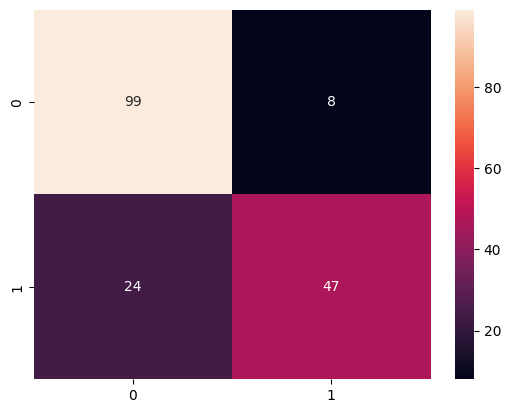

In [38]:
from sklearn.metrics import precision_score ,recall_score, confusion_matrix
#calculate precison and recall
precision=precision_score(y_test, y_predict_lreg)
precision=recall_score(y_test, y_predict_lreg)
#print results
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print("---" *30)
#calculate confusion matrix
confusion =confusion_matrix(y_test, y_predict_lreg)
sns.heatmap(confusion , annot=True, fmt="d")

In [33]:
#fix
# import model model training
from sklearn.ensemble import RandomForestClassifier
print('Random Forest Classifier')
#create instance of model:
model = RandomForestClassifier()
rfc=RandomForestClassifier()
#pass traninog data to model
rfc.fit(x_train , y_train)


Random Forest Classifier


RandomForestClassifier()

In [34]:
#score it
#model evaluation
from sklearn.metrics import classification_report , accuracy_score
#prediction from the model
y_predict_rfc=rfc.predict(x_test)
print("Random Forest Classifier")
#accuracy
print("---" *30)
rfc_accuracy=round(accuracy_score(y_test , y_predict_rfc) *100,2)
print("accuracy" , rfc_accuracy , '*')

Random Forest Classifier
------------------------------------------------------------------------------------------
accuracy 81.46 *


Precision: 0.79
Recall: 0.73
------------------------------------------------------------------------------------------


<Axes: >

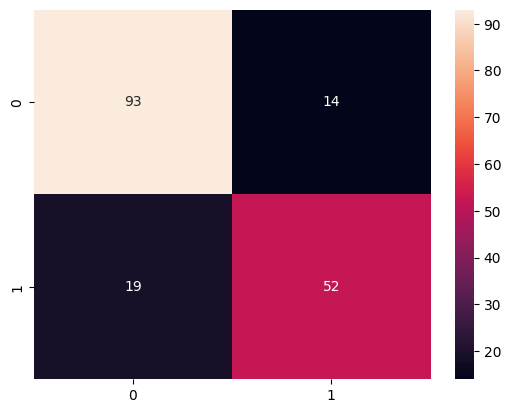

In [37]:
from sklearn.metrics import precision_score ,recall_score, confusion_matrix
#calculate precison and recall
precision=precision_score(y_test, y_predict_rfc)
recall=recall_score(y_test, y_predict_rfc)
#print results
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print("---" *30)
#calculate confusion matrix
confusion =confusion_matrix(y_test, y_predict_rfc)
sns.heatmap(confusion , annot=True, fmt="d")

In [39]:
#model training
#fix
# import model model training
from sklearn.ensemble import GradientBoostingClassifier
print('Gradient Boosting Classifier')
#create instance of model:
model = GradientBoostingClassifier()
gbr=GradientBoostingClassifier()
#pass traninog data to model
gbr.fit(x_train , y_train)


Gradient Boosting Classifier


GradientBoostingClassifier()

In [40]:
#score it
#model evaluation
from sklearn.metrics import classification_report , accuracy_score
#prediction from the model
y_predict_gbr=gbr.predict(x_test)
print("Gradient Boosting Classifier")
#accuracy
print("---" *30)
gbr_accuracy=round(accuracy_score(y_test , y_predict_gbr) *100,2)
print("accuracy" , gbr_accuracy , '*')

Gradient Boosting Classifier
------------------------------------------------------------------------------------------
accuracy 84.27 *


Precision: 0.83
Recall: 0.76
------------------------------------------------------------------------------------------


<Axes: >

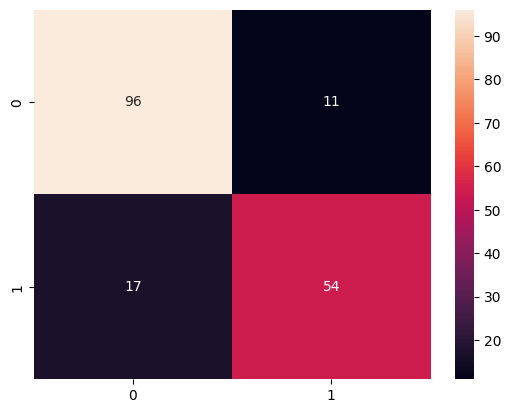

In [41]:
from sklearn.metrics import precision_score ,recall_score, confusion_matrix
#calculate precison and recall
precision=precision_score(y_test, y_predict_gbr)
recall=recall_score(y_test, y_predict_gbr)
#print results
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print("---" *30)
#calculate confusion matrix
confusion =confusion_matrix(y_test, y_predict_gbr)
sns.heatmap(confusion , annot=True, fmt="d")

In [42]:
#model training
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree Classifier')
#create instance of model:
model = DecisionTreeClassifier()
model = DecisionTreeClassifier()
DTc= DecisionTreeClassifier()
#pass traninog data to model
DTc.fit(x_train , y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [43]:
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree Classifier')
#create instance of model:
model = DecisionTreeClassifier()
DTc= DecisionTreeClassifier()
#pass traninog data to model
DTc.fit(x_train , y_train)


Decision Tree Classifier


DecisionTreeClassifier()

In [44]:
#model evaluation
from sklearn.metrics import classification_report , accuracy_score
#prediction from the model
y_predict_DTc=DTc.predict(x_test)
print("Decision Tree Classifier")
#accuracy
print("---" *30)
DTc_accuracy=round(accuracy_score(y_test , y_predict_DTc) *100,2)
print("accuracy" , DTc_accuracy , '*')

Decision Tree Classifier
------------------------------------------------------------------------------------------
accuracy 79.78 *


Precision: 0.73
Recall: 0.77
------------------------------------------------------------------------------------------


<Axes: >

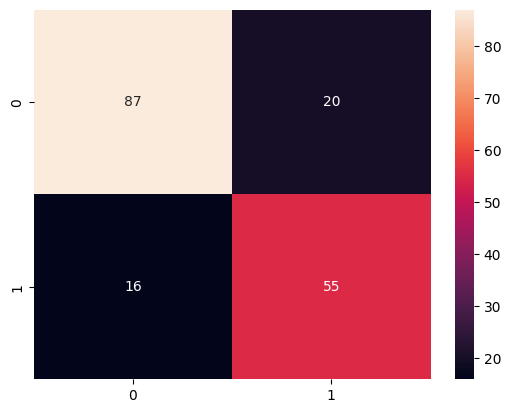

In [45]:
from sklearn.metrics import precision_score ,recall_score, confusion_matrix
#calculate precison and recall
precision=precision_score(y_test, y_predict_DTc)
recall=recall_score(y_test, y_predict_DTc)
#print results
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print("---" *30)
#calculate confusion matrix
confusion =confusion_matrix(y_test, y_predict_DTc)
sns.heatmap(confusion , annot=True, fmt="d")

In [ ]:
model_scores = {
    "Logistic Regression": 82.02,
    "Decision Tree Classifier": 78.65,
    "Gradient Boosting Classifier": 84.27,
    "Random Forest Classifier": 83.07
}

# Sort the model scores in descending order
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of models
print("Model ranking (greater values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f'{rank}. {model_name}: {score}')


Model ranking (greater values are better):
1. Gradient Boosting Classifier: 84.27
2. Random Forest Classifier: 83.07
3. Logistic Regression: 82.02
4. Decision Tree Classifier: 78.65
